# Dataset Visualization

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from seqgen.vocabulary import *
from seqgen.datasets.sequences import *
from seqgen.preprocess import *
from seqgen.seq_gen import add_noise_to_coordinates

%load_ext autoreload
%autoreload 2

In [2]:
batch_size=4
max_length=50
img_width=800
img_height=200

vocab_in = Vocabulary(vocab_filename="seqgen/vocab_in.txt")
vocab_out = Vocabulary(vocab_filename="seqgen/vocab_out.txt")

dataset = SyntheticSequenceDataset(vocab_in, vocab_out, max_length, batch_size, continue_prob=0.95, device="cpu")

In [3]:
input_seqs, coordinates, target_seqs = dataset[0]

C:\Users\tilof\PycharmProjects\UniProjects\symbol-extraction\seqgen\datasets\sequences.py:27: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_seqs = torch.tensor(features[:, :, 0]).to(torch.int64)
C:\Users\tilof\PycharmProjects\UniProjects\symbol-extraction\seqgen\datasets\sequences.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  coordinates = torch.tensor(features[:, :, 1:])


In [4]:
coordinates[:, :, [0,2]] *= img_width
coordinates[:, :, [1,3]] *= img_height

In [5]:
def create_img_array_from_coordinates(coordinates):
    img_array = torch.zeros((img_height, img_width))
    for i in range(max_length):
        x0, y0, x1, y1 = coordinates[i].to(torch.int64)
        img_array[int(y0):int(y1), int(x0):int(x0)+1] = 1.0
        img_array[int(y0):int(y1), int(x1):int(x1)+1] = 1.0
        img_array[int(y0):int(y0)+1, int(x0):int(x1)] = 1.0
        img_array[int(y1):int(y1)+1, int(x0):int(x1)] = 1.0
    return img_array

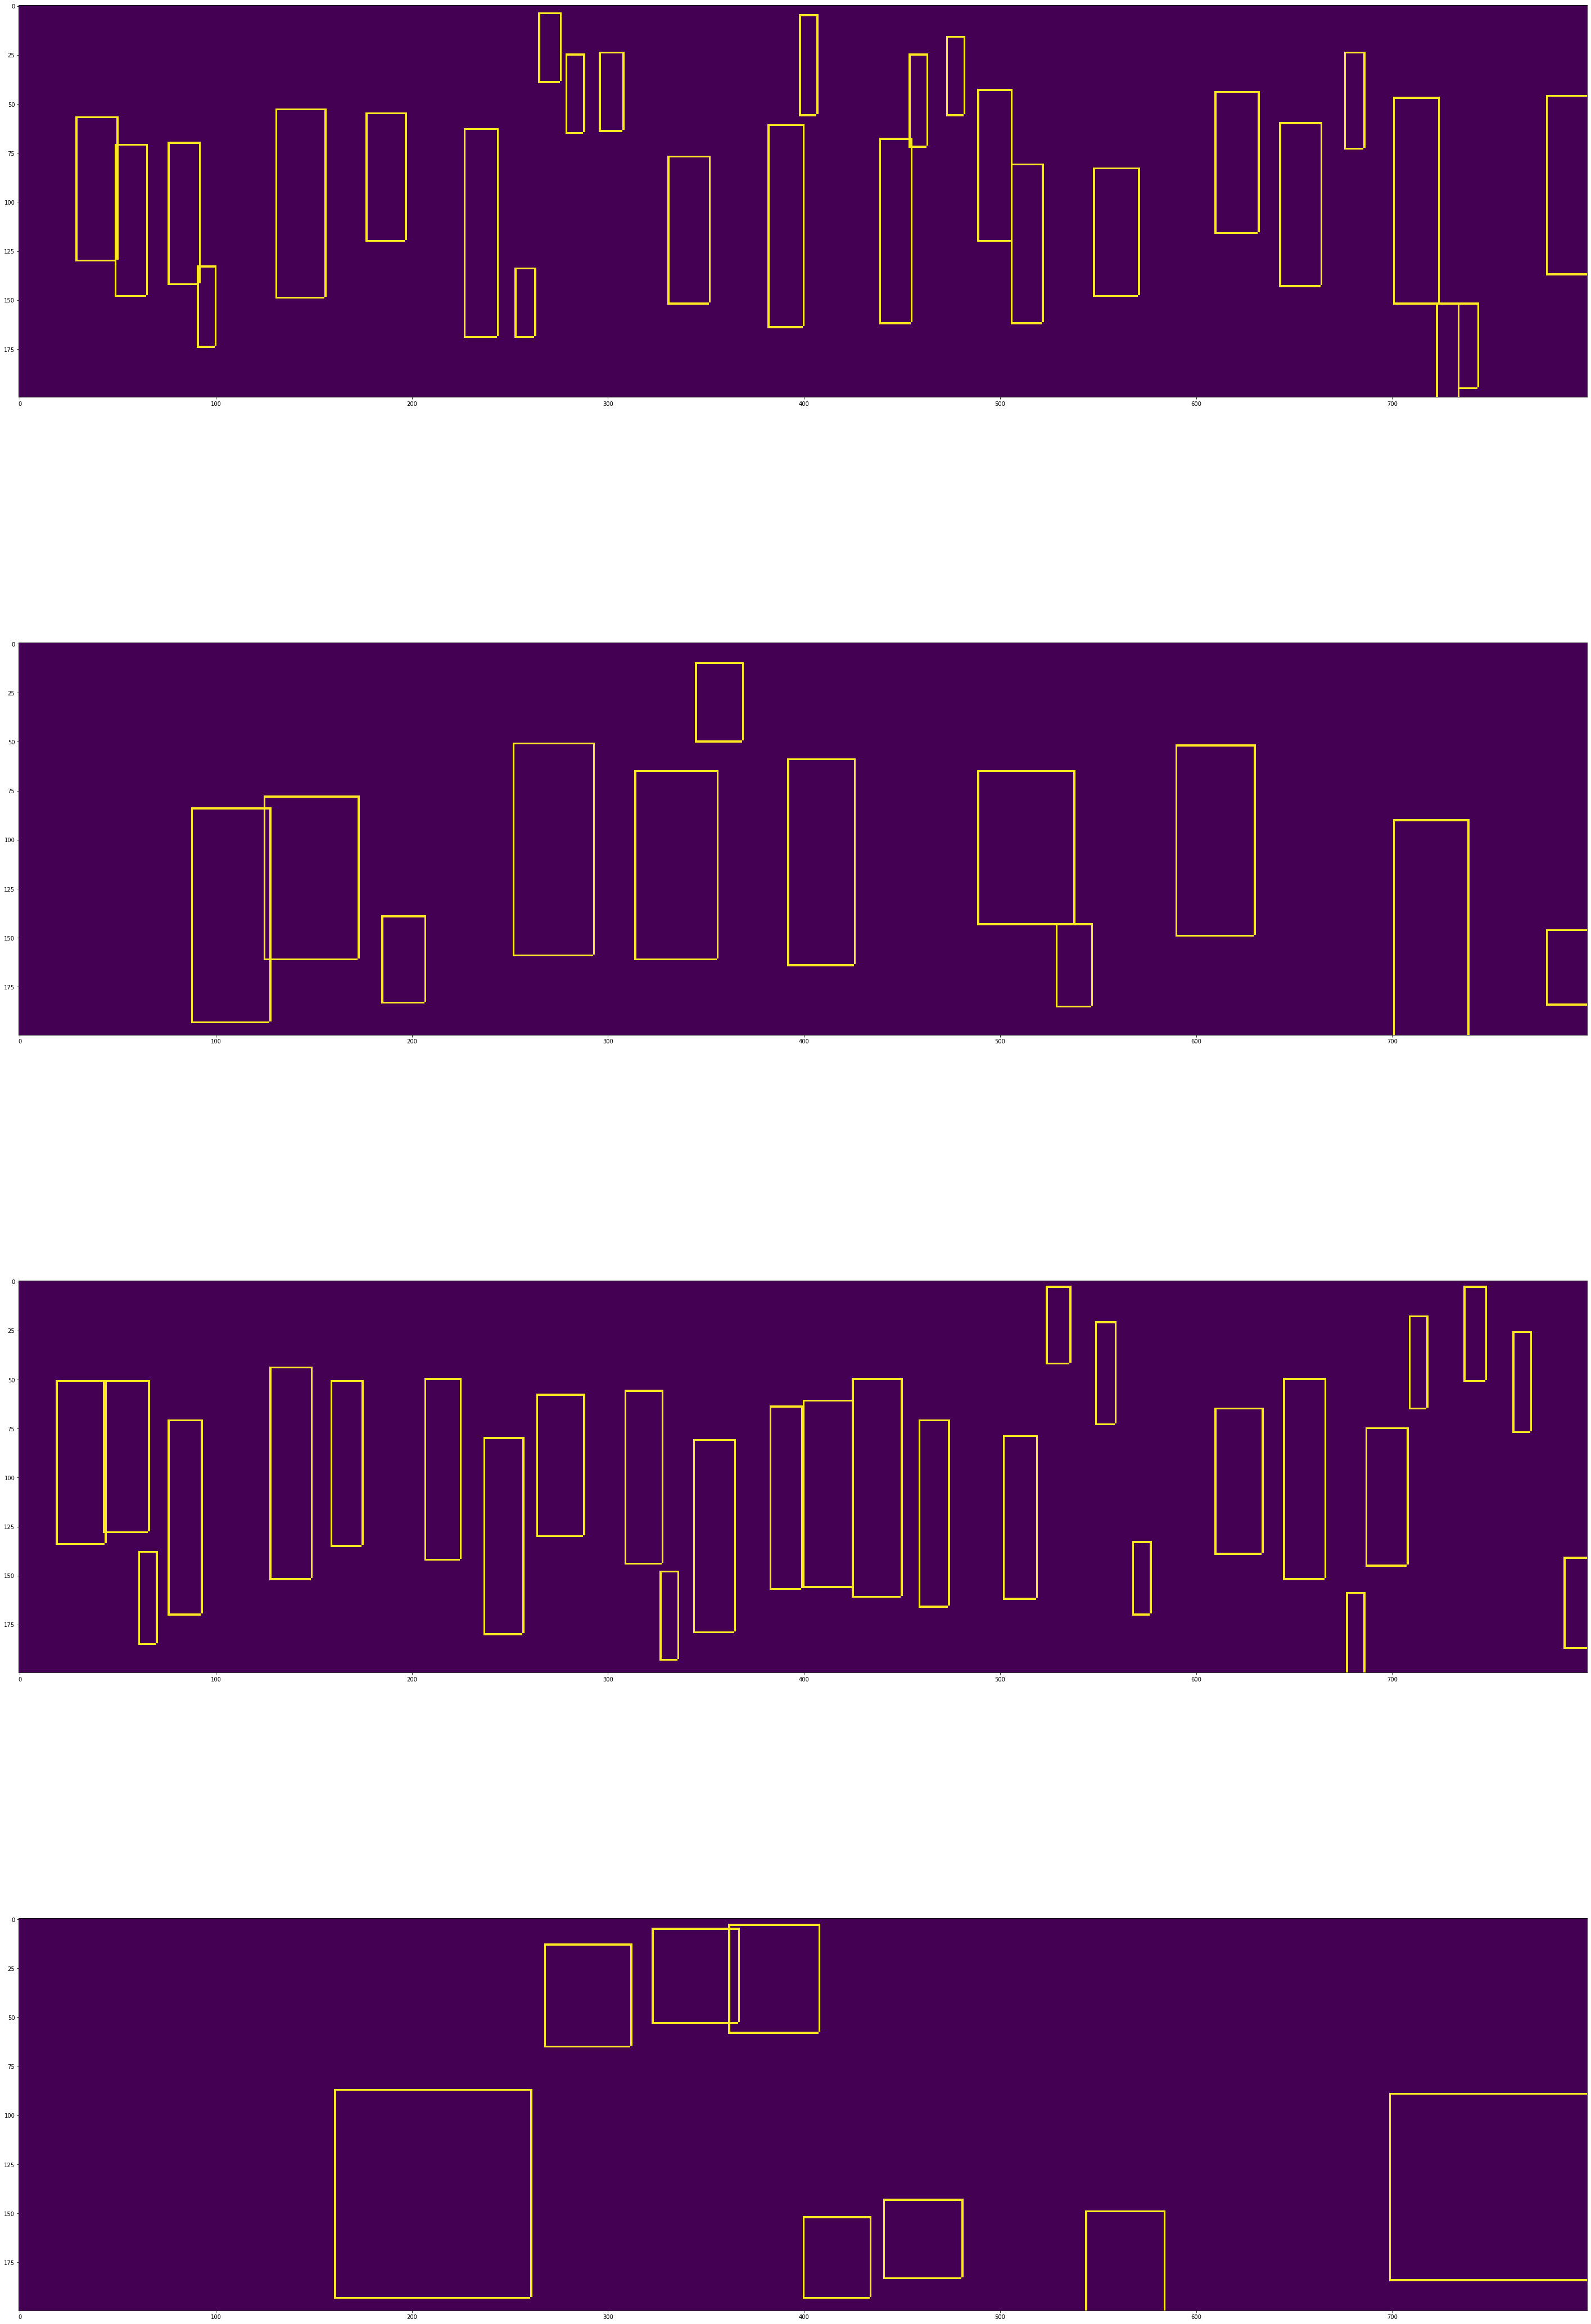

In [6]:
fig, ax = plt.subplots(batch_size, figsize=(50, 80))

for i in range(batch_size):
    ax[i].imshow(create_img_array_from_coordinates(coordinates[i]).numpy())

In [7]:
from seqgen.datasets.realdata import RealSequencesDataset
dataset = RealSequencesDataset(filename="data/val/label.txt", vocab_in=vocab_in, vocab_out=vocab_out, max_length=50, batch_size=10)

input_seqs, coordinates, target_seqs = dataset.__getitem__(0)
input_seqs[0].shape, coordinates[0].shape, target_seqs[0].shape

(torch.Size([52]), torch.Size([52, 4]), torch.Size([52]))

In [8]:
coordinates[i][0:5], add_noise_to_coordinates(np.array(coordinates[i]))[0:5]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.4615, 0.6792],
         [0.4816, 0.1170, 0.7124, 0.7472],
         [0.8562, 0.1585, 1.0000, 1.0000],
         [0.0000, 0.0000, 0.0000, 0.0000]]),
 array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
         [-0.00362971,  0.06441601,  0.46247724,  0.65960294],
         [ 0.47974414,  0.10390428,  0.6991188 ,  0.7528819 ],
         [ 0.86877793,  0.12358668,  0.99960166,  0.9654384 ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        ,  0.        ],
         [ 0.        ,  0. 

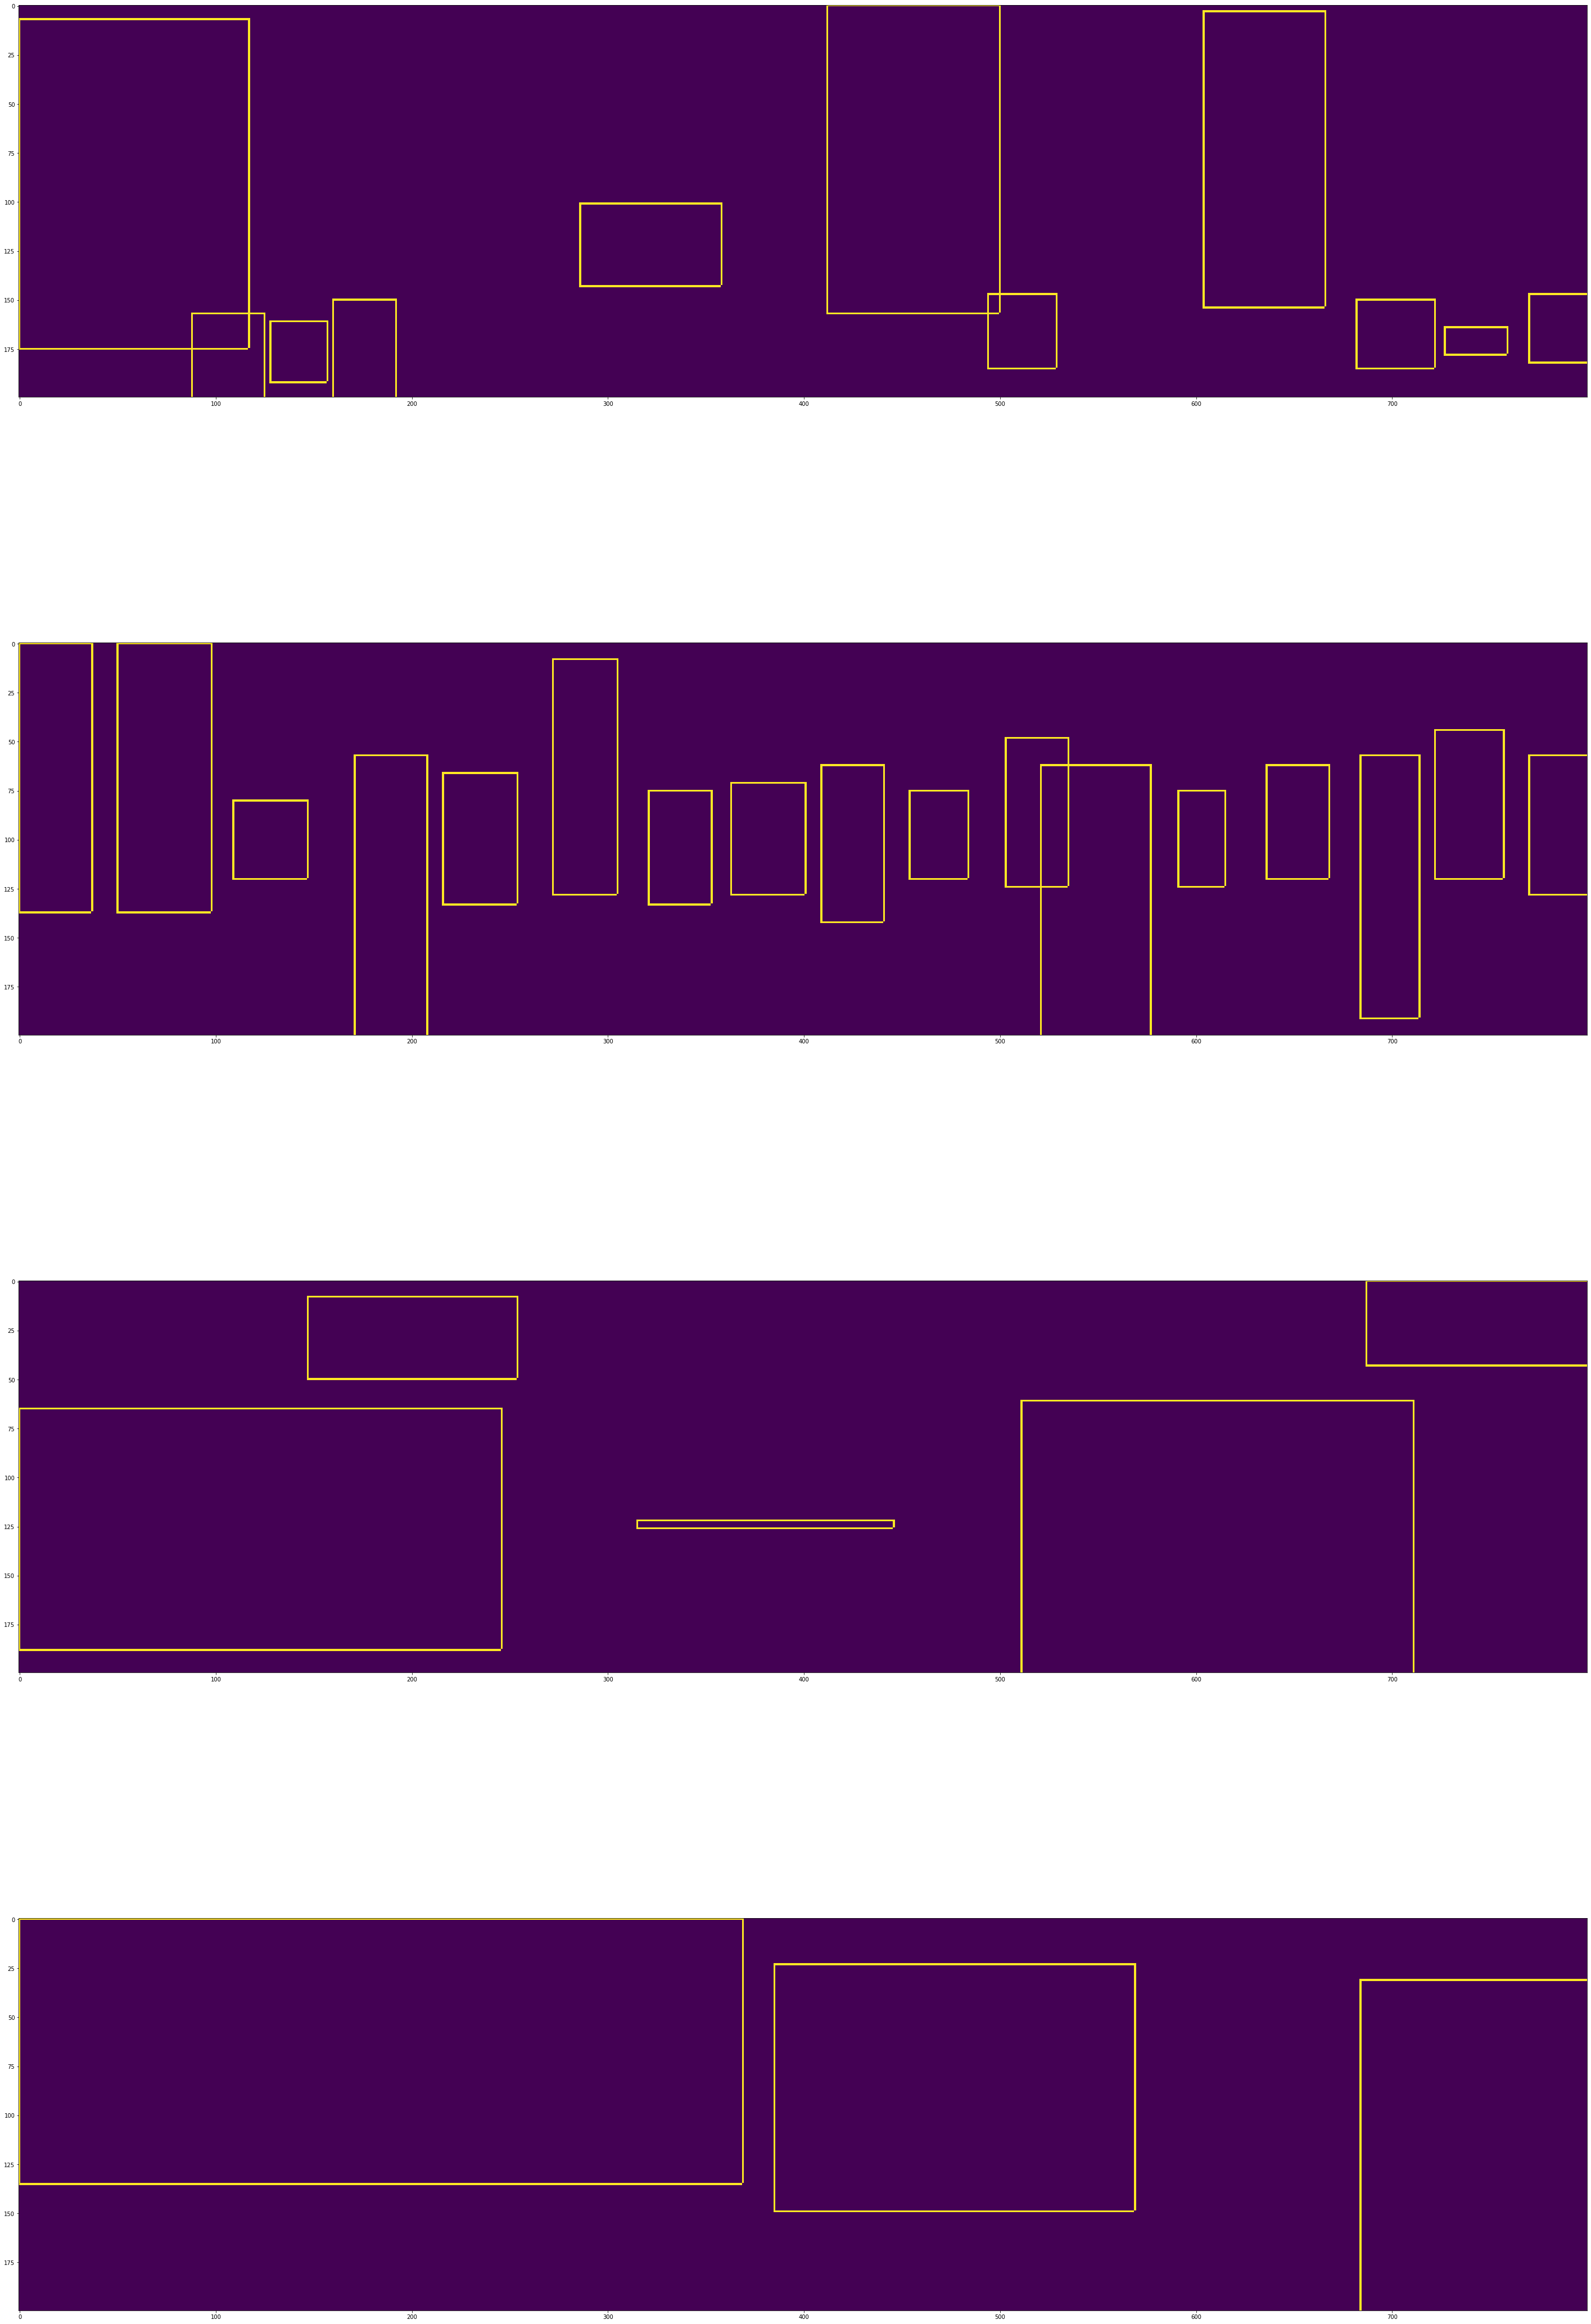

In [9]:
fig, ax = plt.subplots(batch_size, figsize=(50, 80))

for i in range(batch_size):
    coords = np.array(coordinates[i])
    coords = np.array(normalize_coordinates(np.array([coords]), contains_class=False)).squeeze()
    coords[:, [0,2]] *= img_width
    coords[:, [1,3]] *= img_height
    coords = torch.tensor(coords)
    ax[i].imshow(create_img_array_from_coordinates(coords).numpy())

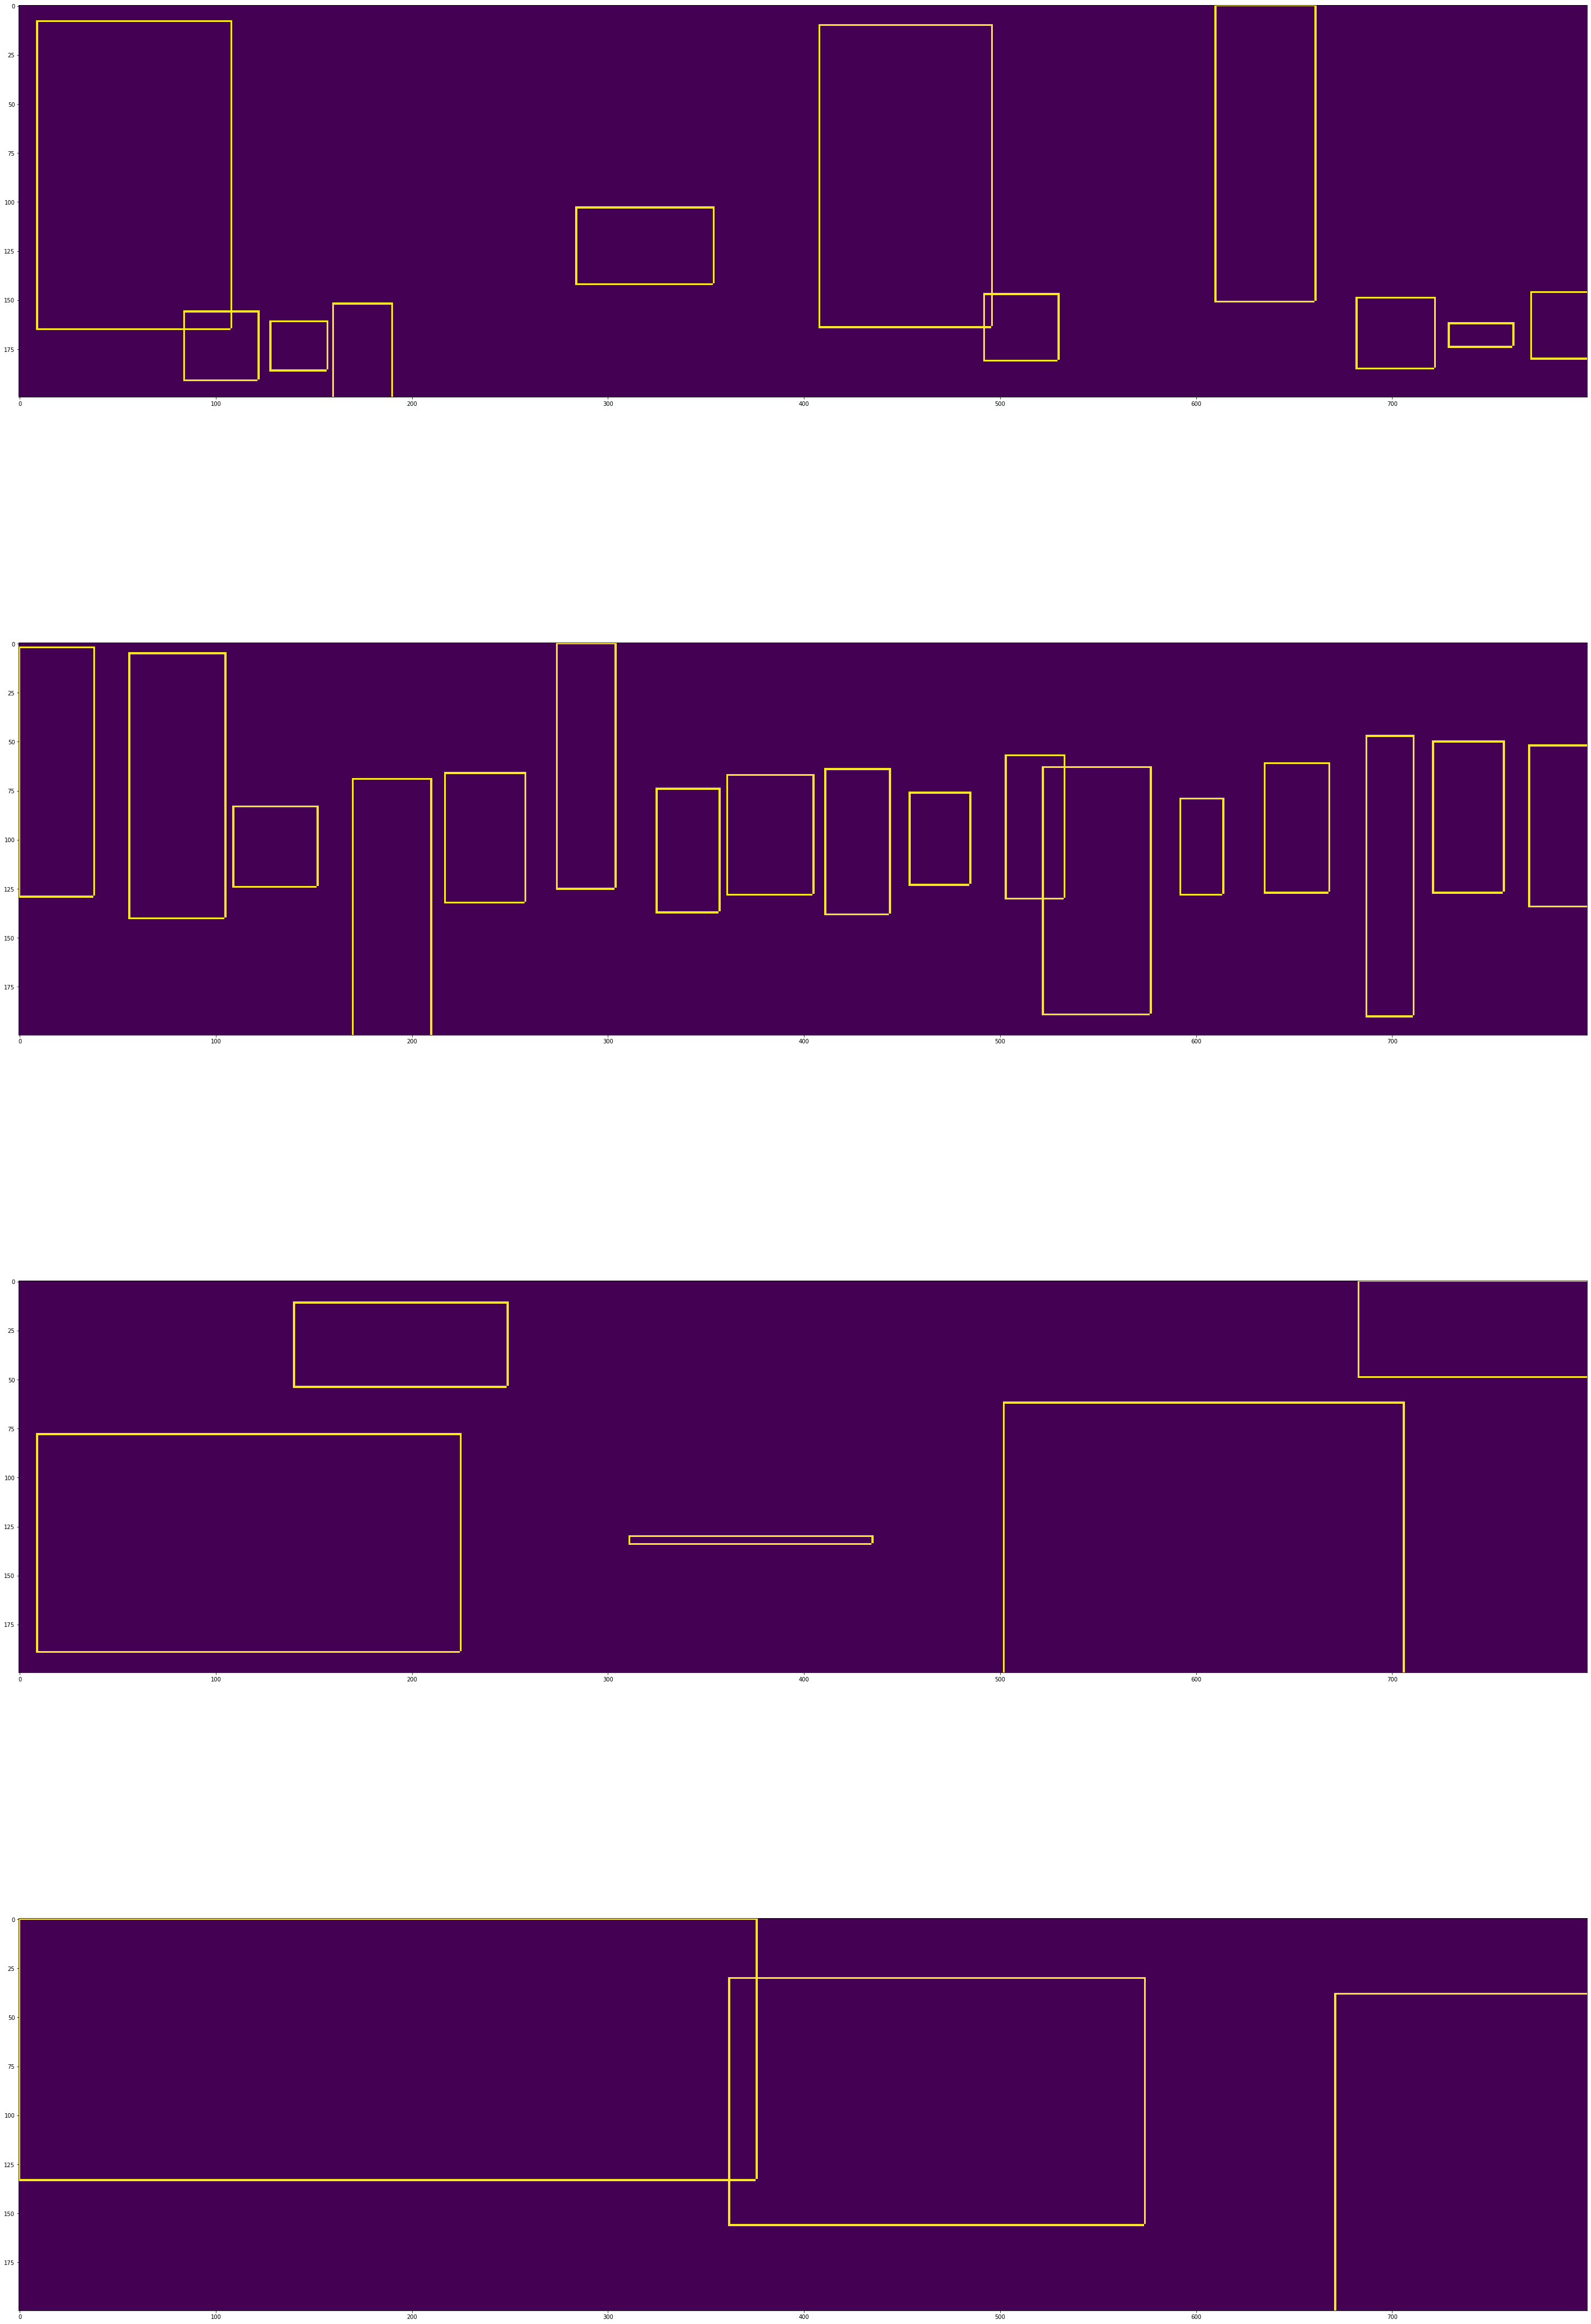

In [10]:
fig, ax = plt.subplots(batch_size, figsize=(50, 80))

for i in range(batch_size):
    coords = add_noise_to_coordinates(coordinates[i])
    coords = np.array(normalize_coordinates(np.array(coords), contains_class=False)).squeeze()
    coords[:, [0,2]] *= img_width
    coords[:, [1,3]] *= img_height
    coords = torch.tensor(coords)
    ax[i].imshow(create_img_array_from_coordinates(coords).numpy())

In [11]:
coordinates[0], input_seqs[0]

(tensor([[0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0351, 0.1472, 0.8772],
         [0.1104, 0.7895, 0.1572, 1.0000],
         [0.1605, 0.8070, 0.1973, 0.9649],
         [0.2007, 0.7544, 0.2408, 1.0000],
         [0.3579, 0.5088, 0.4482, 0.7193],
         [0.5151, 0.0000, 0.6254, 0.7895],
         [0.6187, 0.7368, 0.6622, 0.9298],
         [0.7559, 0.0175, 0.8328, 0.7719],
         [0.8528, 0.7544, 0.9030, 0.9298],
         [0.9097, 0.8246, 0.9498, 0.8947],
         [0.9632, 0.7368, 1.0000, 0.9123],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000],
         [0

In [12]:
input_seqs[3]

tensor([ 0, 67, 13, 62, 44, 50, 67, 13, 67, 13, 22, 44,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])